# Q1.ForestFires

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
ff = pd.read_csv("D:/Assignment/Assingments/Support Vector Machines/forestfires.csv")
ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
ff.shape

(517, 31)

In [5]:
ff.index

RangeIndex(start=0, stop=517, step=1)

In [6]:
ff.count()

month            517
day              517
FFMC             517
DMC              517
DC               517
ISI              517
temp             517
RH               517
wind             517
rain             517
area             517
dayfri           517
daymon           517
daysat           517
daysun           517
daythu           517
daytue           517
daywed           517
monthapr         517
monthaug         517
monthdec         517
monthfeb         517
monthjan         517
monthjul         517
monthjun         517
monthmar         517
monthmay         517
monthnov         517
monthoct         517
monthsep         517
size_category    517
dtype: int64

array([[<AxesSubplot:title={'center':'temp'}>]], dtype=object)

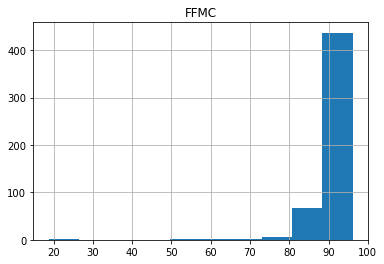

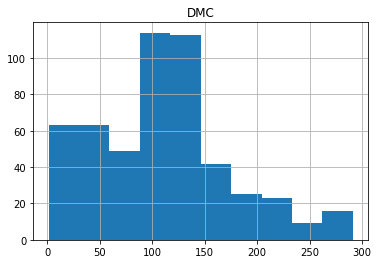

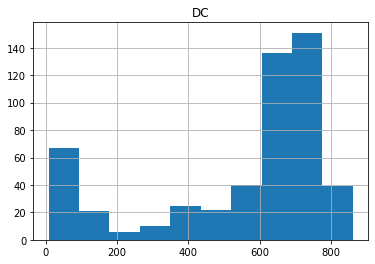

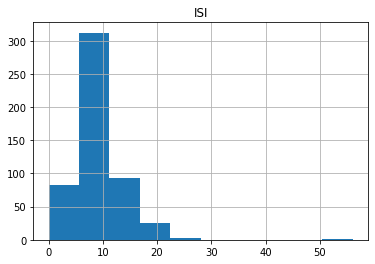

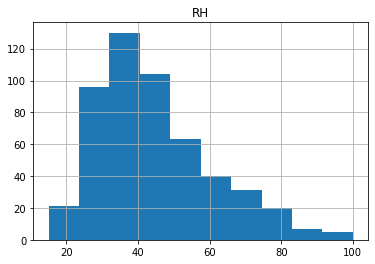

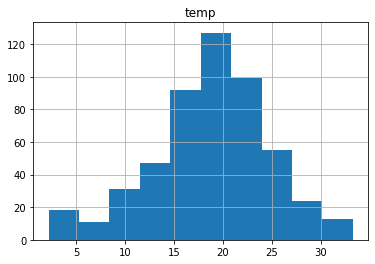

In [7]:
ff.hist('FFMC')
ff.hist('DMC')
ff.hist('DC')
ff.hist('ISI')
ff.hist('RH')
ff.hist('temp')

In [8]:
##Dropping the month and day columns
ff.drop(["month","day"],axis=1,inplace =True)

In [9]:
array = ff.values
X = array[:,0:28]
Y = array[:,28]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.35)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((336, 28), (336,), (181, 28), (181,))

In [12]:
# train the model on train set
model = SVC()
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       large       1.00      0.12      0.21        43
       small       0.78      1.00      0.88       138

    accuracy                           0.79       181
   macro avg       0.89      0.56      0.54       181
weighted avg       0.84      0.79      0.72       181



# Using rbf 

In [13]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.706 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.721 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.746 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.761 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [14]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [15]:
clf = SVC(C= 1000, gamma = 0.0001)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 91.71270718232044


array([[ 36,   7],
       [  8, 130]], dtype=int64)

# Using Sigmoid Kernal

In [16]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid

[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 3/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 4/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 5/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 1/5] END C=1000, gamma=0

In [17]:
clf = SVC(C= 0.1, gamma = 1)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 76.24309392265194


array([[  0,  43],
       [  0, 138]], dtype=int64)

# Using polynamial kernal

In [18]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.985 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.985 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.985 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.985 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.985 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.985 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.985 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly

[CV 4/5] END ....C=1000, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.985 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.985 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.985 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.985 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.985 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.985 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.001, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.001, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END .C=1000, gamma=

In [19]:
clf = SVC(C= 10, gamma = 0.0001)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 91.16022099447514


array([[ 32,  11],
       [  5, 133]], dtype=int64)

In [20]:
# rbf = 87.29281767955801
# sigmoid = 67.95580110497238
# poly = 87.84530386740332
# " Best model accuracy is polynamial kernal with 87.8453% "
 

# Q2 . Salary Data

In [21]:
sd_train = pd.read_csv("D:/Assignment/Assingments/Naive Bayes/SalaryData_Train.csv")
sd_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
sd_test = pd.read_csv("D:/Assignment/Assingments/Naive Bayes/SalaryData_Test.csv")
sd_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [23]:
sd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [24]:
sd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

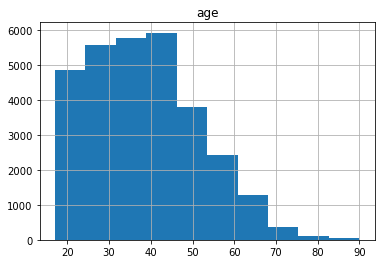

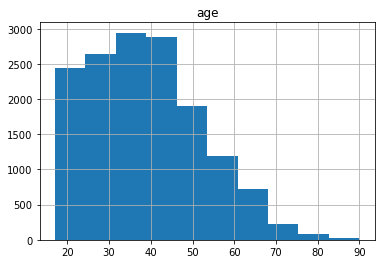

In [25]:
sd_train.hist('age')
sd_test.hist('age')

array([[<AxesSubplot:title={'center':'educationno'}>]], dtype=object)

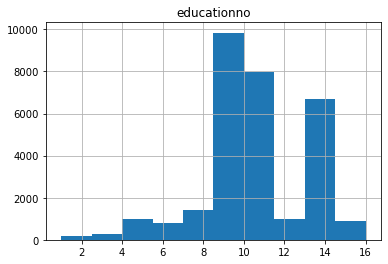

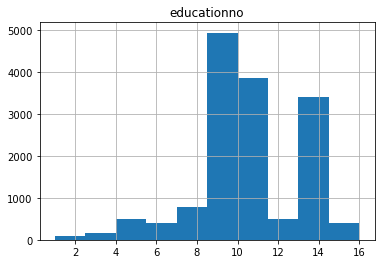

In [26]:
sd_train.hist('educationno')
sd_test.hist('educationno')

In [27]:
sd_train.columns
sd_test.columns
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [28]:
col_names=list(sd_train.columns)
train_X=sd_train[col_names[0:13]]
train_Y=sd_train[col_names[13]]
test_x=sd_test[col_names[0:13]]
test_y=sd_test[col_names[13]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.35)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((336, 28), (336,), (181, 28), (181,))

In [31]:
# train the model on train set
model = SVC()
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       large       1.00      0.07      0.12        45
       small       0.76      1.00      0.87       136

    accuracy                           0.77       181
   macro avg       0.88      0.53      0.50       181
weighted avg       0.82      0.77      0.68       181



# Using rbf

In [32]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.721 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.791 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

In [33]:
clf = SVC(C= 1000, gamma = 0.0001)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 92.81767955801105


array([[ 41,   4],
       [  9, 127]], dtype=int64)

# Using Sigmoid Kernal

In [34]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.721 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.721 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.721 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid

[CV 3/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.721 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.716 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.0001, kernel=sigmoid;, score=0.603 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.0001, kernel=sigmoid;, score=0.627 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.0001, kernel=sigmoid;, score=0.627 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.0001, kernel=sigmoid;, score=0.612 total time=   0.0s
[CV 5/5] END C=

In [35]:
clf = SVC(C= 0.1, gamma = 1)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 75.13812154696133


array([[  0,  45],
       [  0, 136]], dtype=int64)

# Using polynamial Kernal

In [36]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.926 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.955 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.970 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.955 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.910 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.926 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.955 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.970 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.955 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.910 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.926 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly

[CV 3/5] END ......C=1000, gamma=1, kernel=poly;, score=0.970 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=1, kernel=poly;, score=0.955 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=1, kernel=poly;, score=0.910 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.926 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.955 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.970 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.955 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.910 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.926 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.955 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.970 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.955 total time=   0.0s
[CV 5/5] END ...C=1000, gamm

In [37]:
clf = SVC(C= 1, gamma = 0.0001)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 83.42541436464089


array([[ 15,  30],
       [  0, 136]], dtype=int64)

In [38]:
# rbf = 92.81767955801105
# sigmoid = 75.13812154696133
# poly = 82.32044198895028
# " Best model accuracy is rbf kernal with 92.81% "